In [276]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import warnings

In [277]:
warnings.filterwarnings("ignore")

In [278]:
tf.__version__

'2.15.0'

In [279]:
df = pd.read_csv('/kaggle/input/hf-data/heart_failure_clinical_records_dataset.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [280]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [281]:
print(X)
print(y)

[[7.500e+01 0.000e+00 5.820e+02 ... 1.000e+00 0.000e+00 4.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 1.000e+00 0.000e+00 6.000e+00]
 [6.500e+01 0.000e+00 1.460e+02 ... 1.000e+00 1.000e+00 7.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 0.000e+00 2.780e+02]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 1.000e+00 2.800e+02]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 1.000e+00 2.850e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [283]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [284]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

*EDA*

0 - No | 1 - Yes


<Axes: xlabel='diabetes', ylabel='Count'>

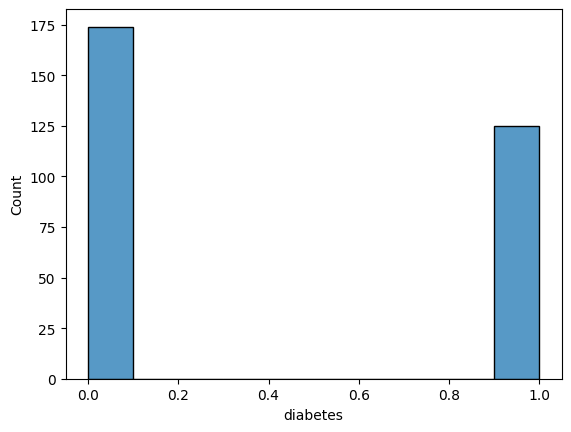

In [285]:
print("0 - No | 1 - Yes")
sns.histplot(df['diabetes'], bins=10)

0 - No | 1 - Yes


<Axes: xlabel='high_blood_pressure', ylabel='Count'>

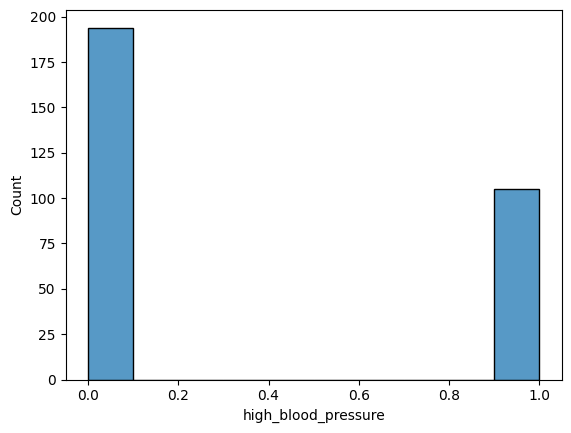

In [286]:
print("0 - No | 1 - Yes")
sns.histplot(df['high_blood_pressure'], bins=10)

<Axes: xlabel='smoking', ylabel='Count'>

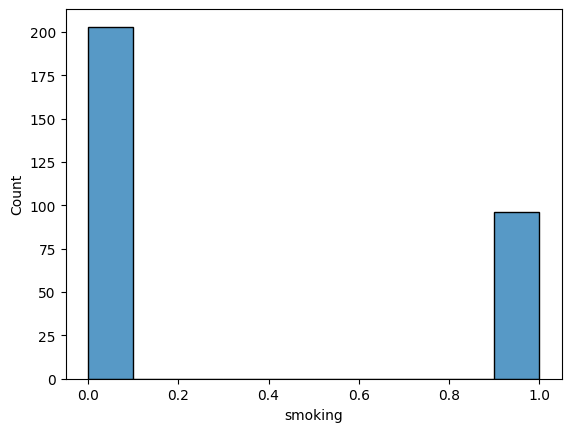

In [287]:
sns.histplot(df['smoking'], bins=10)

<Axes: xlabel='DEATH_EVENT', ylabel='Count'>

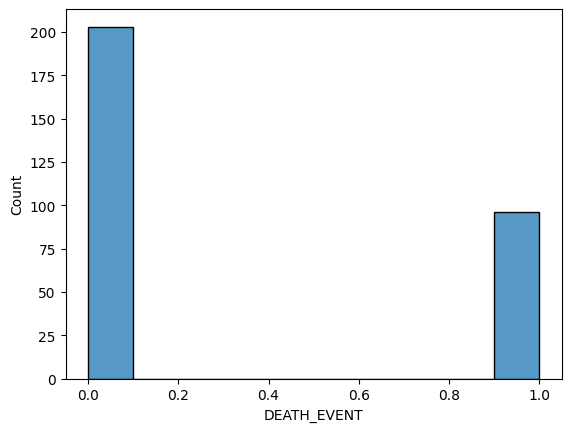

In [288]:
sns.histplot(df['DEATH_EVENT'], bins=10)

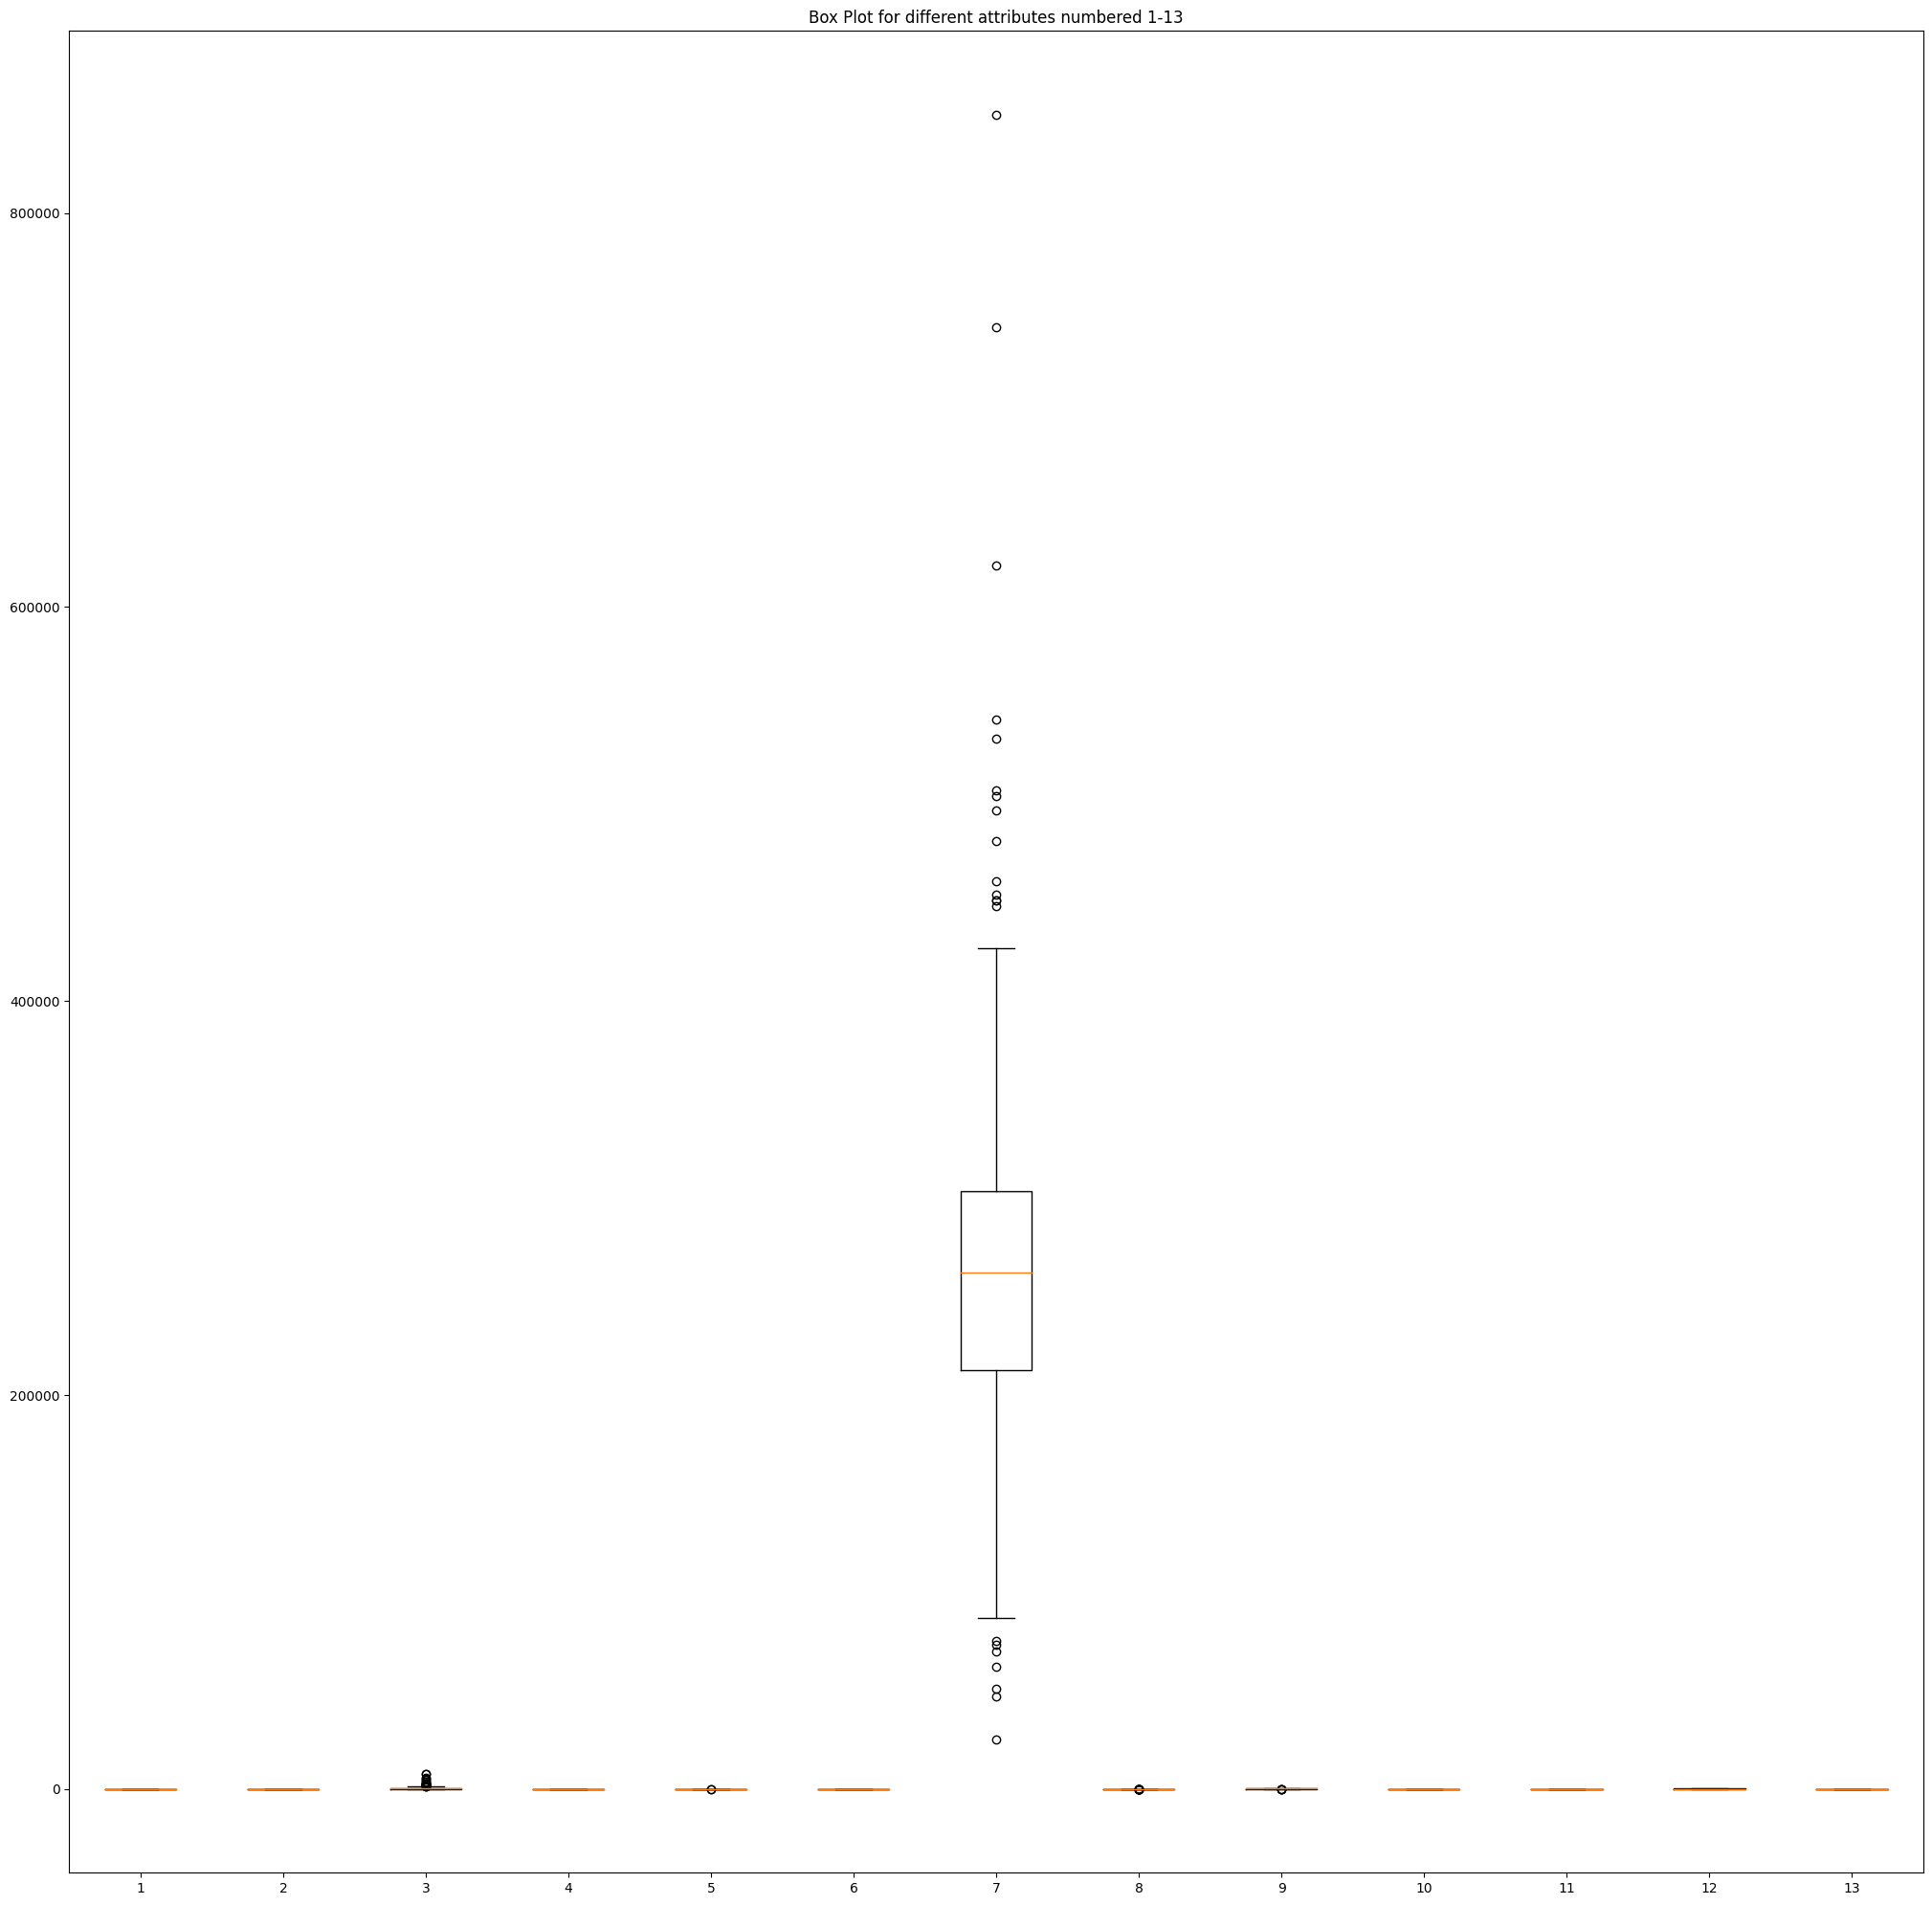

In [289]:
plt.figure(figsize = (25, 25))
plt.boxplot(df)
plt.title('Box Plot for different attributes numbered 1-13')
plt.show()

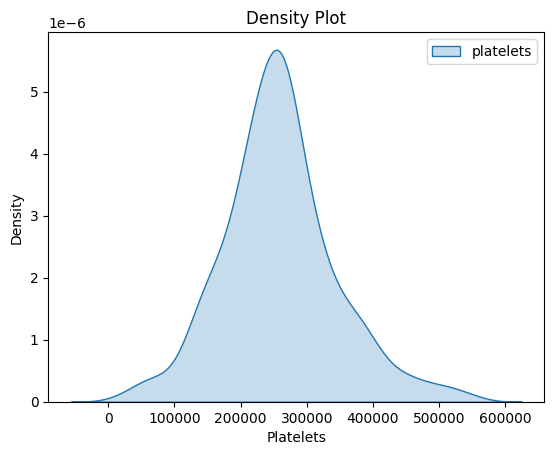

In [290]:
sns.kdeplot(fd[['platelets']], shade=True)
plt.xlabel('Platelets')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()

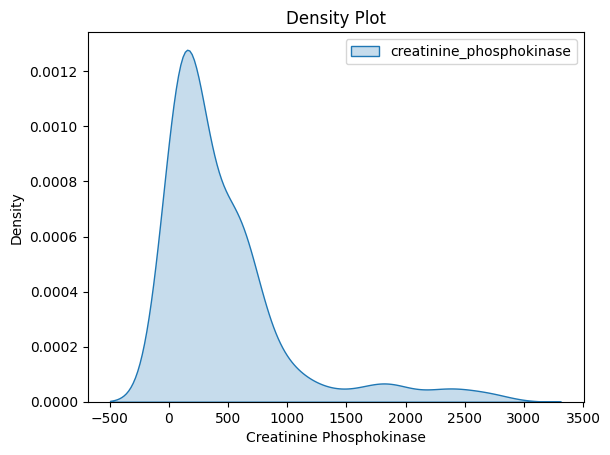

In [291]:
sns.kdeplot(fd[['creatinine_phosphokinase']], shade=True)
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()

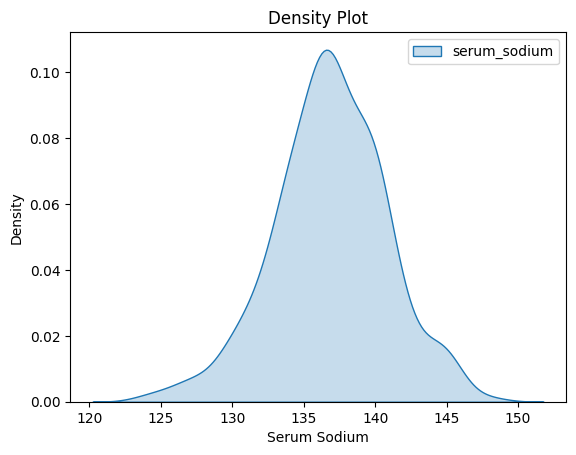

In [292]:
sns.kdeplot(fd[['serum_sodium']], shade=True)
plt.xlabel('Serum Sodium')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()

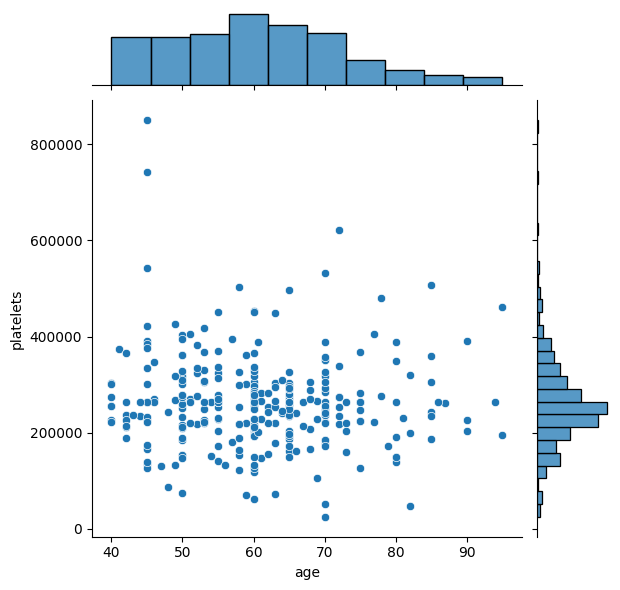

In [293]:
# plt.figure(figsize=(10, 10))
sns.jointplot(x='age', y='platelets', data=df, kind='scatter')
plt.show()

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [296]:
print(X_train, X_test)

[[ 1.70455927 -0.89274435  4.04602991 ...  0.73616267  1.46449201
  -0.29449203]
 [-0.92576852 -0.89274435 -0.39339316 ...  0.73616267  1.46449201
  -0.2297298 ]
 [-1.35001494 -0.89274435  0.01130281 ...  0.73616267 -0.68283063
  -0.89030457]
 ...
 [ 2.0439564   1.1201415  -0.47800215 ... -1.35839541 -0.68283063
  -0.46287383]
 [-0.07727569 -0.89274435  0.01130281 ...  0.73616267  1.46449201
  -1.16230595]
 [ 0.77121715  1.1201415  -0.40766456 ...  0.73616267  1.46449201
   0.21065339]] [[-1.77426136  1.1201415  -0.47902153 -0.84091787  0.19723428 -0.76340124
  -0.42516583 -0.59870359  0.96163666 -1.35839541 -0.68283063  0.7417037 ]
 [-0.02068121  1.1201415  -0.42805227  1.18917678  0.19723428  1.30992713
  -0.6775321  -0.37986111 -0.12761055 -1.35839541 -0.68283063  0.547417  ]
 [-1.35001494  1.1201415   0.41803755 -0.84091787 -0.68386838 -0.76340124
  -1.33368438 -0.27043986  0.09023889  0.73616267 -0.68283063 -1.5379269 ]
 [-0.5015221  -0.89274435  0.01130281  1.18917678 -0.24331705

*Initializing ANN*

In [297]:
ann = tf.keras.models.Sequential()

*First layer*

In [298]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) # 6 neurons

*Second hidden layer*

In [299]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

In [300]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # 1 neuron for '0' or '1'

*Compiling ANN*

In [301]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

*Training the model*

In [302]:
ann.fit(X_train, y_train, batch_size = 128, epochs = 400)

Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4713 - loss: 0.7052
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4871 - loss: 0.7042 
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4715 - loss: 0.7074 
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4977 - loss: 0.6962 
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5010 - loss: 0.7065 
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5068 - loss: 0.7027 
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5462 - loss: 0.6937 
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5475 - loss: 0.7025 
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5531 - loss: 0.6961 
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5723 - loss: 0.6924 
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6070 - loss: 0.6894 
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6154 - loss

In [303]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


In [305]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[35  2]
 [ 9 14]]


0.8166666666666667